# Prediction task is to determine whether a person's income is over $50,000 a year.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('adult_income.csv')

data.head(20)

In [3]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [4]:
data['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Target Feature is **income column** and independent variables are the others.<br>
This is **binary classification. Label has only two kinds.**

In [5]:
data.shape

(48842, 15)

### we have 48842 rows and 15 columns. - before cleaning

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
#Find missing values
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

we have missing values of "workclass", "occupation" and "native_country". 

In [8]:
data.duplicated().sum()

52

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(48790, 15)

In [12]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [14]:
data['workclass'] = data.groupby(['education','age'])['workclass'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [15]:
data.isnull().sum()

age                  0
workclass           37
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

In [16]:
data[data['workclass'].isna()]

age workclass  fnlwgt    education  education_num      marital_status  \
160     68       NaN   38317      1st-4th              2            Divorced   
2486    75       NaN  164849          9th              5  Married-civ-spouse   
5294    77       NaN  132728      Masters             14            Divorced   
9140    77       NaN   28678      Masters             14  Married-civ-spouse   
10709   77       NaN  143516      Masters             14  Married-civ-spouse   
11532   79       NaN  142370  Prof-school             15  Married-civ-spouse   
11734   65       NaN  293385    Preschool              1  Married-civ-spouse   
13025   84       NaN  368925      5th-6th              3             Widowed   
13026   79       NaN  100881   Assoc-acdm             12  Married-civ-spouse   
13784   73       NaN  191394  Prof-school             15  Married-civ-spouse   
18386   66       NaN  196736      1st-4th              2       Never-married   
19168   67       NaN  163726      5th-6th              3  Married-civ-spouse   
19180   82       NaN   42435         10th              6             Widowed   
21746   67       NaN  159542      5th-6th              3             Widowed   
21812   82       NaN  194590    Assoc-voc             11             Widowed   
22898   84       NaN  127184      5th-6th              3  Married-civ-spouse   
22951   71       NaN  178295   Assoc-acdm             12  Married-civ-spouse   
24238   90       NaN  166343      1st-4th              2             Widowed   
24405   76       NaN  201986         11th              7             Widowed   
25163   79       NaN   76641      Masters             14  Married-civ-spouse   
25270   78       NaN   74795   Assoc-acdm             12             Widowed   
31372   67       NaN   34122      5th-6th              3  Married-civ-spouse   
31836   80       NaN  281768   Assoc-acdm             12  Married-civ-spouse   
32525   81       NaN  120478    Assoc-voc             11            Divorced   
32539   71       NaN  287372    Doctorate             16  Married-civ-spouse   
33487   79       NaN   27457      Masters             14       Never-married   
33590   57       NaN  274680    Preschool              1           Separated   
34395   83       NaN   29702      7th-8th              4  Married-civ-spouse   
35409   75       NaN   27663      7th-8th              4           Separated   
36101   29       NaN  565769    Preschool              1       Never-married   
37707   77       NaN  309955   Assoc-acdm             12  Married-civ-spouse   
40072   68       NaN  186163      1st-4th              2             Widowed   
44442   79       NaN   23275         10th              6  Married-civ-spouse   
46056   77       NaN  180425      Masters             14  Married-civ-spouse   
46399   78       NaN  109498          9th              5             Widowed   
47969   89       NaN   29106         10th              6  Married-civ-spouse   
48812   81       NaN   26711    Assoc-voc             11  Married-civ-spouse   

      occupation    relationship   race     sex  capital_gain  capital_loss  \
160          NaN   Not-in-family  White  Female             0             0   
2486         NaN         Husband  Black    Male          1409             0   
5294         NaN   Not-in-family  White    Male             0             0   
9140         NaN         Husband  White    Male          9386             0   
10709        NaN         Husband  White    Male             0             0   
11532        NaN         Husband  White    Male             0             0   
11734        NaN         Husband  Black    Male             0             0   
13025        NaN   Not-in-family  White    Male             0             0   
13026        NaN            Wife  White  Female             0             0   
13784        NaN         Husband  White    Male             0             0   
18386        NaN   Not-in-family  Black    Male             0             0   
19168        NaN  

I can't find any special things so I decided to fill new category which is 'unknown'.

In [17]:
data['workclass'].fillna('Unknown', inplace=True)

In [18]:
data.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
income               0
dtype: int64

In [19]:
data['occupation'] = data.groupby(['workclass','education'])['occupation'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [20]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation         47
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    856
income              0
dtype: int64

In [21]:
data[data['occupation'].isna()]

age     workclass  fnlwgt     education  education_num  \
160     68       Unknown   38317       1st-4th              2   
2486    75       Unknown  164849           9th              5   
5294    77       Unknown  132728       Masters             14   
5361    18  Never-worked  206359          10th              6   
9140    77       Unknown   28678       Masters             14   
10709   77       Unknown  143516       Masters             14   
10845   23  Never-worked  188535       7th-8th              4   
11532   79       Unknown  142370   Prof-school             15   
11734   65       Unknown  293385     Preschool              1   
13025   84       Unknown  368925       5th-6th              3   
13026   79       Unknown  100881    Assoc-acdm             12   
13784   73       Unknown  191394   Prof-school             15   
14772   17  Never-worked  237272          10th              6   
18386   66       Unknown  196736       1st-4th              2   
19168   67       Unknown  163726       5th-6th              3   
19180   82       Unknown   42435          10th              6   
20337   18  Never-worked  157131          11th              7   
21746   67       Unknown  159542       5th-6th              3   
21812   82       Unknown  194590     Assoc-voc             11   
22898   84       Unknown  127184       5th-6th              3   
22951   71       Unknown  178295    Assoc-acdm             12   
23232   20  Never-worked  462294  Some-college             10   
24238   90       Unknown  166343       1st-4th              2   
24405   76       Unknown  201986          11th              7   
25163   79       Unknown   76641       Masters             14   
25270   78       Unknown   74795    Assoc-acdm             12   
31372   67       Unknown   34122       5th-6th              3   
31836   80       Unknown  281768    Assoc-acdm             12   
32304   30  Never-worked  176673       HS-grad              9   
32314   18  Never-worked  153663  Some-college             10   
32525   81       Unknown  120478     Assoc-voc             11   
32539   71       Unknown  287372     Doctorate             16   
33487   79       Unknown   27457       Masters             14   
33590   57       Unknown  274680     Preschool              1   
34395   83       Unknown   29702       7th-8th              4   
35409   75       Unknown   27663       7th-8th              4   
36101   29       Unknown  565769     Preschool              1   
37707   77       Unknown  309955    Assoc-acdm             12   
40072   68       Unknown  186163       1st-4th              2   
41346   17  Never-worked  131593          11th              7   
44168   20  Never-worked  273905       HS-grad              9   
44442   79       Unknown   23275          10th              6   
46056   77       Unknown  180425       Masters             14   
46399   78       Unknown  109498           9th              5   
46459   18  Never-worked  162908          11th              7   
47969   89       Unknown   29106          10th              6   
48812   81       Unknown   26711     Assoc-voc             11   

              marital_status occupation    relationship   race     sex  \
160                 Divorced        NaN   Not-in-family  White  Female   
2486      Married-civ-spouse        NaN         Husband  Black    Male   
5294                Divorced        NaN   Not-in-family  White    Male   
5361           Never-married        NaN       Own-child  White    Male   
9140      Married-civ-spouse        NaN         Husband  White    Male   
10709     Married-civ-spouse        NaN         Husband  White    Male   
10845               Divorced        NaN   Not-in-family  White    Male   
11532     Married-civ-spouse        NaN         Husband  White    Male   
11734     Married-civ-spouse        NaN         Husband  Black    Male   
13025                Widowed        NaN   Not-in-family  White    Male   
13026     Married-civ-spouse        NaN            Wife  White  Female  

In [22]:
data['occupation'] = data.groupby('education')['occupation'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [23]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    856
income              0
dtype: int64

In [24]:
data['native_country'] = data.groupby('race')['native_country'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [25]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:
edu_check = data.groupby("education")["education_num"].unique()
edu_check.sort_values(ascending=True)

education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: education_num, dtype: object

In [27]:
edu_check = data.groupby("education")["education_num"].nunique()
print(edu_check[edu_check > 1])

Series([], Name: education_num, dtype: int64)


education_num is good matching with education column.<br>
It is continuous and the values are consistent.

### Finding Outliers

In [28]:
data['income'].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

After checking modeling performance, I will decide whether use SMOTE or not.

In [29]:
data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48790.000000  4.879000e+04   48790.000000  48790.000000  48790.000000   
mean      38.652798  1.896690e+05      10.078807   1080.217688     87.595573   
std       13.708493  1.056172e+05       2.570046   7455.905921    403.209129   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781385e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376062e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    48790.000000  
mean        40.425886  
std         12.392729  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [30]:
data[data['capital_gain']== 99999]['age'].sum()

11373

In capital_gain column, the mean(1080) is much smaller than the standard deviation(7455), and all quartiles (25, 50, 75%) are 0.<br> The maximum value is likely to be an outlier.

In [31]:
captial_median = data['capital_gain'].median()
data.loc[data['capital_gain']== 99999, 'capital_gain'] = captial_median

In [32]:
data['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865,  6514,  1471,  2329,  2105,  2885, 25124, 10520,
        2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,  5556,
        4787,  3781,  3137,  3818,  3942,   914,   401,  2829,  2977,
        4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,  4416,
        3908, 10566,   991,  4931,  1086,  7430,  6497,   114,  7896,
        2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831, 41310,
        4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,  1455,
        2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,  1173,
        4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,  2387,
        5060,  1264,  7262,  1731,  6612])

<Axes: >

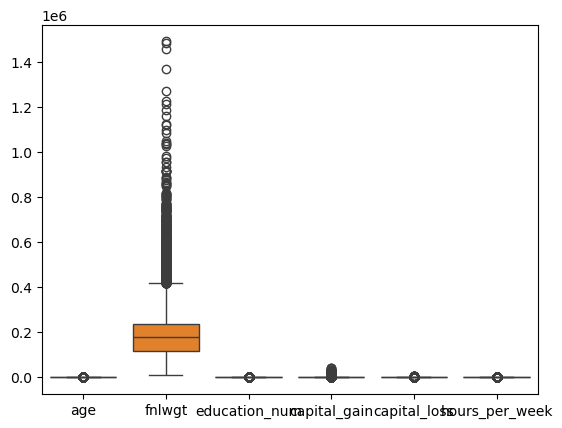

In [33]:
sns.boxplot(data=data)

In [34]:
data[(data['hours_per_week']>70) & (data['age'] > 60)]['age'].sum()

3367

that doesn't make sense so I replaced median instead of that range.

In [35]:
hours_median = data['hours_per_week'].median()
data.loc[(data['age'] > 60) & (data['hours_per_week'] > 70), 'hours_per_week'] = hours_median

In [36]:
# only numerical data type
columns = data.select_dtypes(include=['number']).columns

for value in columns:
    Q1 = data[value].quantile(0.25)
    Q3 = data[value].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # check number of outliers
    outliers = data[(data[value] < lower_bound) | (data[value] > upper_bound)]
    num_outliers = outliers.shape[0]
    outlier_ratio = (num_outliers / len(data[value])) * 100
    
    print(f"{value}: {outlier_ratio: .2f}%")

age:  0.44%
fnlwgt:  2.98%
education_num:  3.66%
capital_gain:  7.77%
capital_loss:  4.68%
hours_per_week:  27.54%


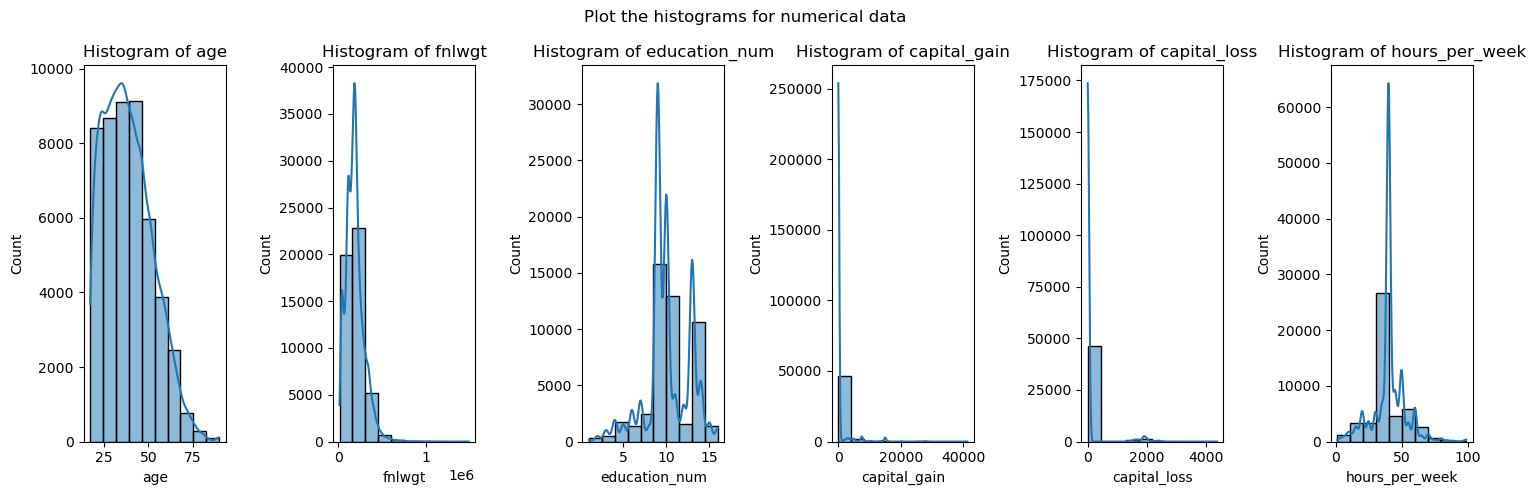

In [37]:
# fig : total, axes : each graph, 1 means one row
fig, axes = plt.subplots(1, len(columns), figsize=(15,5))

fig.suptitle('Plot the histograms for numerical data')

# create each histogram 
for i, col in enumerate(columns):
    sns.histplot(data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}') #subtitle

plt.tight_layout()
plt.show()

In [38]:
# dealing with outliers of 'hours per week' column
Q1 = data['hours_per_week'].quantile(0.25)
Q3 = data['hours_per_week'].quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# set median instead of outlier
median_value = data['hours_per_week'].median()
data.loc[(data['hours_per_week'] < lower_bound) | (data['hours_per_week'] > upper_bound), 'hours_per_week'] = median_value

The distribution of capital_gain is too skewed, so replacing outliers with the median might reduce data reliability.<br>
So I found another way to deal with outliers. <br>

In [39]:
# add new category (binary) for Trees model
data['has_capital_gain'] = (data['capital_gain'] > 0).astype(int)
# change log for reducing scale for linear model
data['capital_gain_log'] = np.log1p(data['capital_gain'])  # log(x+1)

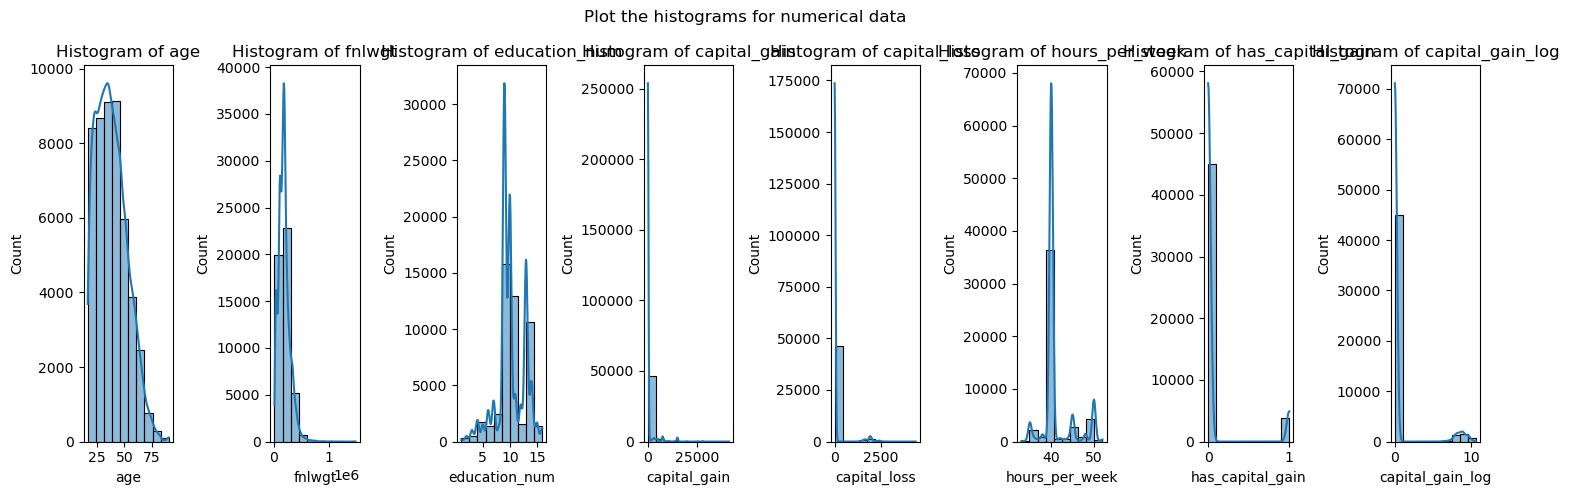

In [40]:
columns = data.select_dtypes(include=['number']).columns

# fig : total, axes : each graph, 1 means one row
fig, axes = plt.subplots(1, len(columns), figsize=(15,5))

fig.suptitle('Plot the histograms for numerical data')

# create each histogram 
for i, col in enumerate(columns):
    sns.histplot(data[col], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}') #subtitle

plt.tight_layout()
plt.show()

In [41]:
for value in columns:
    Q1 = data[value].quantile(0.25)
    Q3 = data[value].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # check number of outliers
    outliers = data[(data[value] < lower_bound) | (data[value] > upper_bound)]
    num_outliers = outliers.shape[0]
    outlier_ratio = (num_outliers / len(data[value])) * 100
    
    print(f"{value}: {outlier_ratio: .2f}%")

age:  0.44%
fnlwgt:  2.98%
education_num:  3.66%
capital_gain:  7.77%
capital_loss:  4.68%
hours_per_week:  25.68%
has_capital_gain:  7.77%
capital_gain_log:  7.77%


I reduced around **2%** outliers of 'hours_per_week' coulmn. the left outliers will be scaled using feature scaling.

In [42]:
data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48790.000000  4.879000e+04   48790.000000  48790.000000  48790.000000   
mean      38.652798  1.896690e+05      10.078807    580.120209     87.595573   
std       13.708493  1.056172e+05       2.570046   2531.917871    403.209129   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175550e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781385e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376062e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  41310.000000   4356.000000   

       hours_per_week  has_capital_gain  capital_gain_log  
count    48790.000000      48790.000000      48790.000000  
mean        41.132035          0.077700          0.671744  
std          3.490430          0.267702          2.324642  
min         33.000000          0.000000          0.000000  
25%         40.000000          0.000000          0.000000  
50%         40.000000          0.000000          0.000000  
75%         40.000000          0.000000          0.000000  
max         52.000000          1.000000         10.628884

In [43]:
data.duplicated().sum()

55

In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data.duplicated().sum()

0

In [46]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country      0
income              0
has_capital_gain    0
capital_gain_log    0
dtype: int64

In [47]:
data.shape

(48735, 17)

### after cleaning, we have 48735 rows and 17 columns

### Category Data type to Numerical Data type

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48735 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               48735 non-null  int64  
 1   workclass         48735 non-null  object 
 2   fnlwgt            48735 non-null  int64  
 3   education         48735 non-null  object 
 4   education_num     48735 non-null  int64  
 5   marital_status    48735 non-null  object 
 6   occupation        48735 non-null  object 
 7   relationship      48735 non-null  object 
 8   race              48735 non-null  object 
 9   sex               48735 non-null  object 
 10  capital_gain      48735 non-null  int64  
 11  capital_loss      48735 non-null  int64  
 12  hours_per_week    48735 non-null  int64  
 13  native_country    48735 non-null  object 
 14  income            48735 non-null  object 
 15  has_capital_gain  48735 non-null  int64  
 16  capital_gain_log  48735 non-null  float64
dty

In [49]:
# for education, it already has numerical column which is education_num.
cat_col = ['workclass','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

In [50]:
for col in cat_col:
    print(f"{col} : {data[col].nunique()}")

workclass : 9
marital_status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
native_country : 41
income : 2


In [51]:
la_encoder = LabelEncoder()
data['workclass_en'] = la_encoder.fit_transform(data['workclass'])
data['marital_status_en'] = la_encoder.fit_transform(data['marital_status'])
data['occupation_en'] = la_encoder.fit_transform(data['occupation'])
data['relationship_en'] = la_encoder.fit_transform(data['relationship'])
data['native_country_en'] = la_encoder.fit_transform(data['native_country'])
data['race_trees'] = la_encoder.fit_transform(data['race'])

In [52]:
# one-hot encoding
data = pd.get_dummies(data, columns=['race'], drop_first=True)

In [53]:
data.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship     sex  capital_gain  \
0       Never-married       Adm-clerical  Not-in-family    Male          2174   
1  Married-civ-spouse    Exec-managerial        Husband    Male             0   
2            Divorced  Handlers-cleaners  Not-in-family    Male             0   
3  Married-civ-spouse  Handlers-cleaners        Husband    Male             0   
4  Married-civ-spouse     Prof-specialty           Wife  Female             0   

   ...  workclass_en  marital_status_en occupation_en relationship_en  \
0  ...             6                  4             0               1   
1  ...             5                  2             3               0   
2  ...             3                  0             5               1   
3  ...             3                  2             5               0   
4  ...             3                  2             9               5   

   native_country_en  race_trees  race_Asian-Pac-Islander  race_Black  \
0                 38           4                    False       False   
1                 38           4                    False       False   
2                 38           4                    False       False   
3                 38           2                    False        True   
4                  4           2                    False        True   

   race_Other  race_White  
0       False        True  
1       False        True  
2       False        True  
3       False       False  
4       False       False  

[5 rows x 26 columns]

In [54]:
data['sex'].value_counts(dropna=False)

sex
Male      32589
Female    16146
Name: count, dtype: int64

for "sex" and "income" column, I will recreate new binaries columns.

In [55]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

In [56]:
data['income'].value_counts(dropna=False)

income
<=50K    37057
>50K     11678
Name: count, dtype: int64

In [57]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [58]:
data.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship  sex  capital_gain  \
0       Never-married       Adm-clerical  Not-in-family    0          2174   
1  Married-civ-spouse    Exec-managerial        Husband    0             0   
2            Divorced  Handlers-cleaners  Not-in-family    0             0   
3  Married-civ-spouse  Handlers-cleaners        Husband    0             0   
4  Married-civ-spouse     Prof-specialty           Wife    1             0   

   ...  workclass_en  marital_status_en occupation_en  relationship_en  \
0  ...             6                  4             0                1   
1  ...             5                  2             3                0   
2  ...             3                  0             5                1   
3  ...             3                  2             5                0   
4  ...             3                  2             9                5   

   native_country_en  race_trees  race_Asian-Pac-Islander  race_Black  \
0                 38           4                    False       False   
1                 38           4                    False       False   
2                 38           4                    False       False   
3                 38           2                    False        True   
4                  4           2                    False        True   

   race_Other  race_White  
0       False        True  
1       False        True  
2       False        True  
3       False       False  
4       False       False  

[5 rows x 26 columns]

In [59]:
data['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

## visualize the correlation matrix.

when I perform correlation, we need to pick the column which is encoded.

In [60]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'has_capital_gain', 'capital_gain_log', 'workclass_en',
       'marital_status_en', 'occupation_en', 'relationship_en',
       'native_country_en', 'race_trees', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White'],
      dtype='object')

feature scaling is not neseccery for **trees model**.

In [61]:
tree_data = data[['age', 'fnlwgt', 'education_num', 'sex',
                        'has_capital_gain', 'capital_loss', 'hours_per_week',
                        'workclass_en', 'marital_status_en', 'occupation_en',
                        'relationship_en', 'native_country_en', 'race_trees', 'income' ]]
tree_data.columns

Index(['age', 'fnlwgt', 'education_num', 'sex', 'has_capital_gain',
       'capital_loss', 'hours_per_week', 'workclass_en', 'marital_status_en',
       'occupation_en', 'relationship_en', 'native_country_en', 'race_trees',
       'income'],
      dtype='object')

In [62]:
numeric_data = data[['age', 'fnlwgt', 'education_num', 'sex',
                        'capital_gain_log', 'capital_loss', 'hours_per_week',
                        'workclass_en', 'marital_status_en', 'occupation_en',
                        'relationship_en', 'native_country_en', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'income' ]]
corr = numeric_data.corr()
corr

age    fnlwgt  education_num       sex  \
age                      1.000000 -0.076879       0.030539 -0.087393   
fnlwgt                  -0.076879  1.000000      -0.038831 -0.027758   
education_num            0.030539 -0.038831       1.000000 -0.009252   
sex                     -0.087393 -0.027758      -0.009252  1.000000   
capital_gain_log         0.115636 -0.006782       0.107554 -0.061344   
capital_loss             0.056606 -0.004448       0.081030 -0.045440   
hours_per_week           0.043404 -0.004105       0.124085 -0.158522   
workclass_en             0.053627 -0.027309       0.006045 -0.066506   
marital_status_en       -0.262735  0.029984      -0.069781  0.127108   
occupation_en           -0.000667 -0.000524       0.091214 -0.068199   
relationship_en         -0.262607  0.009164      -0.090593  0.580013   
native_country_en       -0.002681 -0.058242       0.089390  0.002405   
race_Asian-Pac-Islander -0.010879 -0.050666       0.064131  0.003703   
race_Black              -0.017633  0.126050      -0.074666  0.111639   
race_Other              -0.033534  0.005217      -0.044167  0.009828   
race_White               0.032718 -0.063779       0.049611 -0.101374   
income                   0.229677 -0.006497       0.332839 -0.214570   

                         capital_gain_log  capital_loss  hours_per_week  \
age                              0.115636      0.056606        0.043404   
fnlwgt                          -0.006782     -0.004448       -0.004105   
education_num                    0.107554      0.081030        0.124085   
sex                             -0.061344     -0.045440       -0.158522   
capital_gain_log                 1.000000     -0.062854        0.061361   
capital_loss                    -0.062854      1.000000        0.035152   
hours_per_week                   0.061361      0.035152        1.000000   
workclass_en                     0.003166      0.003479        0.031910   
marital_status_en               -0.060273     -0.033622       -0.090382   
occupation_en                    0.014516      0.014739        0.044488   
relationship_en                 -0.075879     -0.057108       -0.164484   
native_country_en                0.010831      0.006528        0.023459   
race_Asian-Pac-Islander         -0.002716      0.003576       -0.017569   
race_Black                      -0.026749     -0.021049       -0.071274   
race_Other                      -0.011129     -0.005620       -0.018497   
race_White                       0.027593      0.020682        0.076936   
income                           0.260138      0.147479        0.177988   

                         workclass_en  marital_status_en  occupation_en  \
age                          0.053627          -0.262735      -0.000667   
fnlwgt                      -0.027309           0.029984      -0.000524   
education_num                0.006045          -0.069781       0.091214   
sex                         -0.066506           0.127108      -0.068199   
capital_gain_log             0.003166          -0.060273       0.014516   
capital_loss                 0.003479          -0.033622       0.014739   
hours_per_week               0.031910          -0.090382       0.044488   
workclass_en                 1.000000          -0.019481       0.017811   
marital_status_en           -0.019481           1.000000      -0.003199   
occupation_en                0.017811          -0.003199       1.000000   
relationship_en             -0.056186           0.187161      -0.066712   
native_country_en           -0.004436          -0.017772      -0.004798   
race_Asian-Pac-Islander      0.007994           0.018020       0.007488   
race_Black                  -0.066277           0.082910      -0.003471   
race_Other                  -0.005058           0.015206       0.000747   
race_White                   0.059864          -0.082127       0.000539   
income                      -0.001203          -0.198459       0.064864   

                         relati

<Axes: >

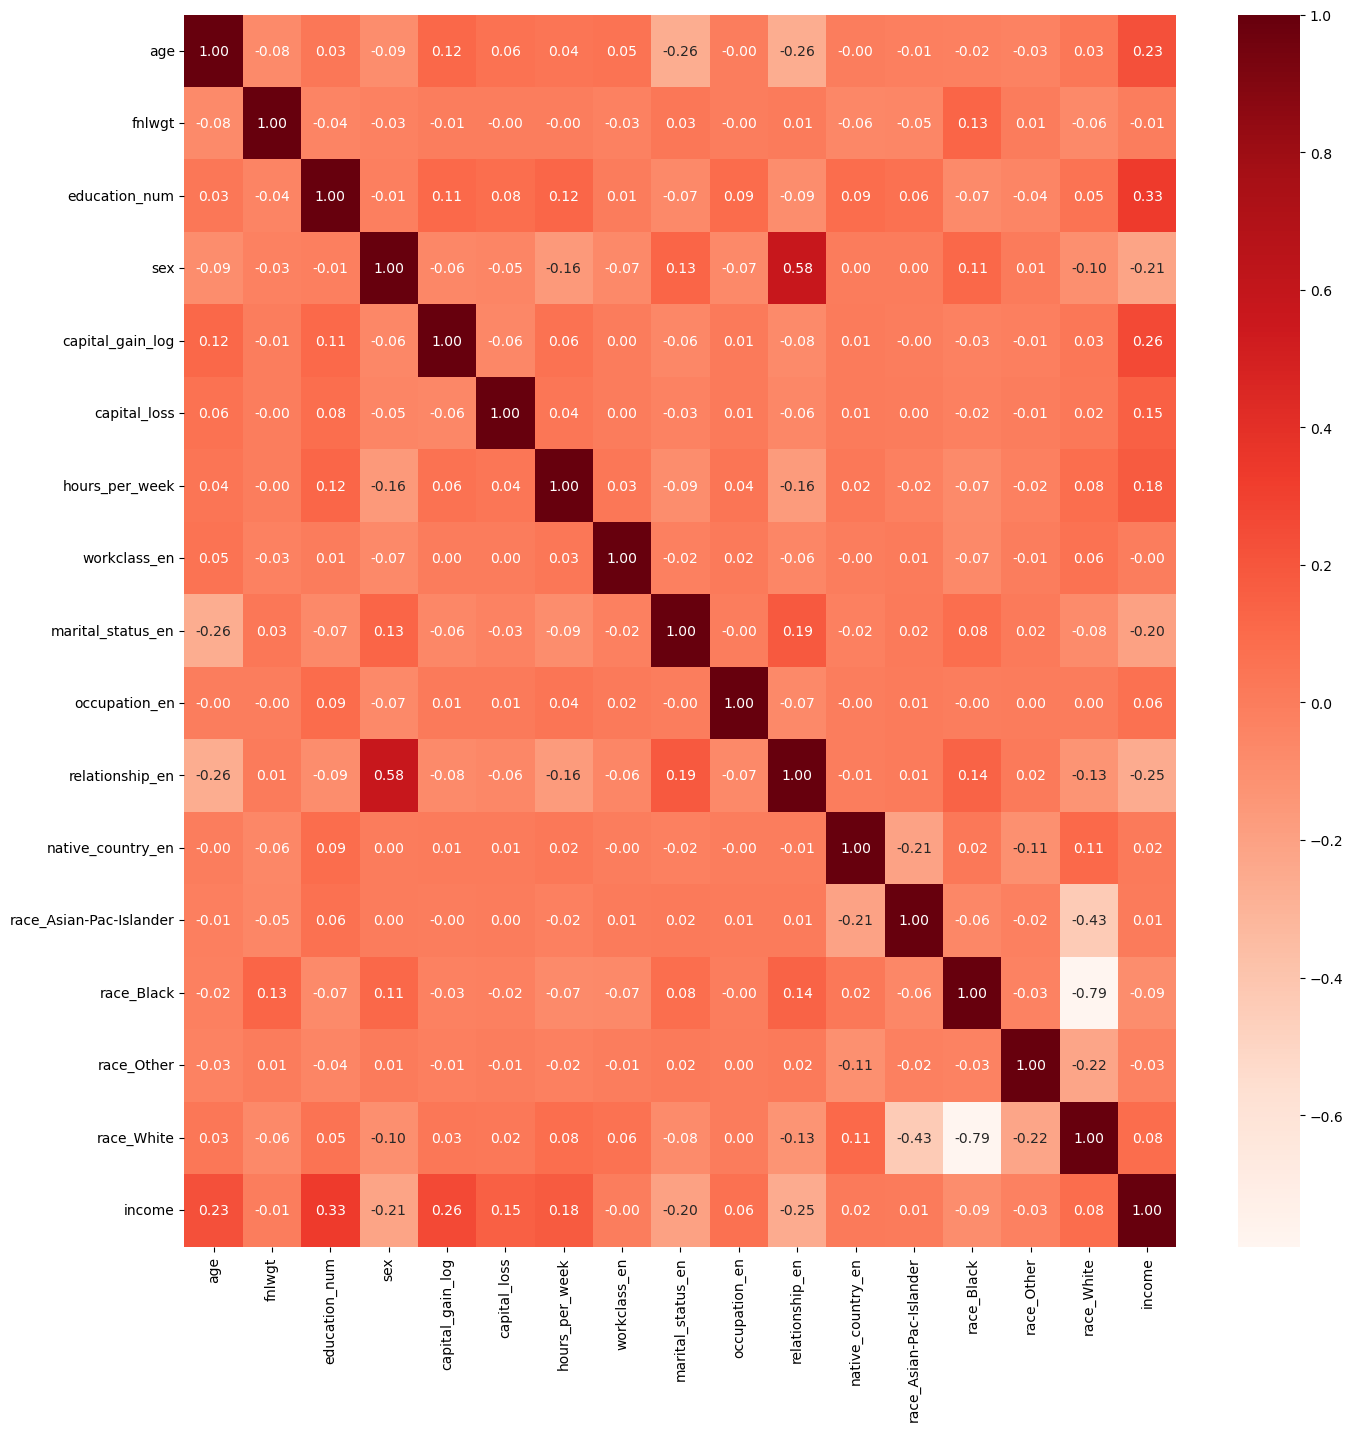

In [63]:
#Correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr, annot=True, cmap='Reds', fmt='.2f')

### the top 3 features that are highly correlated with the target feature

In [64]:
# correlation with target feature('income')
# top3
top_features = corr['income'].abs().sort_values(ascending=False).iloc[1:4] 
top_features

education_num       0.332839
capital_gain_log    0.260138
relationship_en     0.252965
Name: income, dtype: float64

For linear model data set, **"education_num", "capital_gain_log", "age"** columns are highly correlated with target features.

In [65]:
corr_tree = tree_data.corr()
corr_tree

age    fnlwgt  education_num       sex  \
age                1.000000 -0.076879       0.030539 -0.087393   
fnlwgt            -0.076879  1.000000      -0.038831 -0.027758   
education_num      0.030539 -0.038831       1.000000 -0.009252   
sex               -0.087393 -0.027758      -0.009252  1.000000   
has_capital_gain   0.112043 -0.007168       0.097094 -0.057613   
capital_loss       0.056606 -0.004448       0.081030 -0.045440   
hours_per_week     0.043404 -0.004105       0.124085 -0.158522   
workclass_en       0.053627 -0.027309       0.006045 -0.066506   
marital_status_en -0.262735  0.029984      -0.069781  0.127108   
occupation_en     -0.000667 -0.000524       0.091214 -0.068199   
relationship_en   -0.262607  0.009164      -0.090593  0.580013   
native_country_en -0.002681 -0.058242       0.089390  0.002405   
race_trees         0.029150 -0.027118       0.029523 -0.087097   
income             0.229677 -0.006497       0.332839 -0.214570   

                   has_capital_gain  capital_loss  hours_per_week  \
age                        0.112043      0.056606        0.043404   
fnlwgt                    -0.007168     -0.004448       -0.004105   
education_num              0.097094      0.081030        0.124085   
sex                       -0.057613     -0.045440       -0.158522   
has_capital_gain           1.000000     -0.063133        0.056898   
capital_loss              -0.063133      1.000000        0.035152   
hours_per_week             0.056898      0.035152        1.000000   
workclass_en               0.001905      0.003479        0.031910   
marital_status_en         -0.056302     -0.033622       -0.090382   
occupation_en              0.012242      0.014739        0.044488   
relationship_en           -0.071636     -0.057108       -0.164484   
native_country_en          0.010855      0.006528        0.023459   
race_trees                 0.022150      0.018695        0.068883   
income                     0.240246      0.147479        0.177988   

                   workclass_en  marital_status_en  occupation_en  \
age                    0.053627          -0.262735      -0.000667   
fnlwgt                -0.027309           0.029984      -0.000524   
education_num          0.006045          -0.069781       0.091214   
sex                   -0.066506           0.127108      -0.068199   
has_capital_gain       0.001905          -0.056302       0.012242   
capital_loss           0.003479          -0.033622       0.014739   
hours_per_week         0.031910          -0.090382       0.044488   
workclass_en           1.000000          -0.019481       0.017811   
marital_status_en     -0.019481           1.000000      -0.003199   
occupation_en          0.017811          -0.003199       1.000000   
relationship_en       -0.056186           0.187161      -0.066712   
native_country_en     -0.004436          -0.017772      -0.004798   
race_trees             0.053517          -0.070390       0.000257   
income                -0.001203          -0.198459       0.064864   

                   relationship_en  native_country_en  race_trees    income  
age                      -0.262607          -0.002681    0.029150  0.229677  
fnlwgt                    0.009164          -0.058242   -0.027118 -0.006497  
education_num            -0.090593           0.089390    0.029523  0.332839  
sex                       0.580013           0.002405   -0.087097 -0.214570  
has_capital_gain         -0.071636           0.010855    0.022150  0.240246  
capital_loss             -0.057108           0.006528    0.018695  0.147479  
hours_per_week           -0.164484           0.023459    0.068883  0.177988  
workclass_en             -0.056186          -0.004436    0.053517 -0.001203  
marital_status_en         0.187161          -0.017772   -0.070390 -0.198459  
occupation_en            -0.066712          -0.004798    0.000257  0.064864  
relationship_en           1.000000          -0.007304   -0.117305 -0.252965  
native_country_en        

<Axes: >

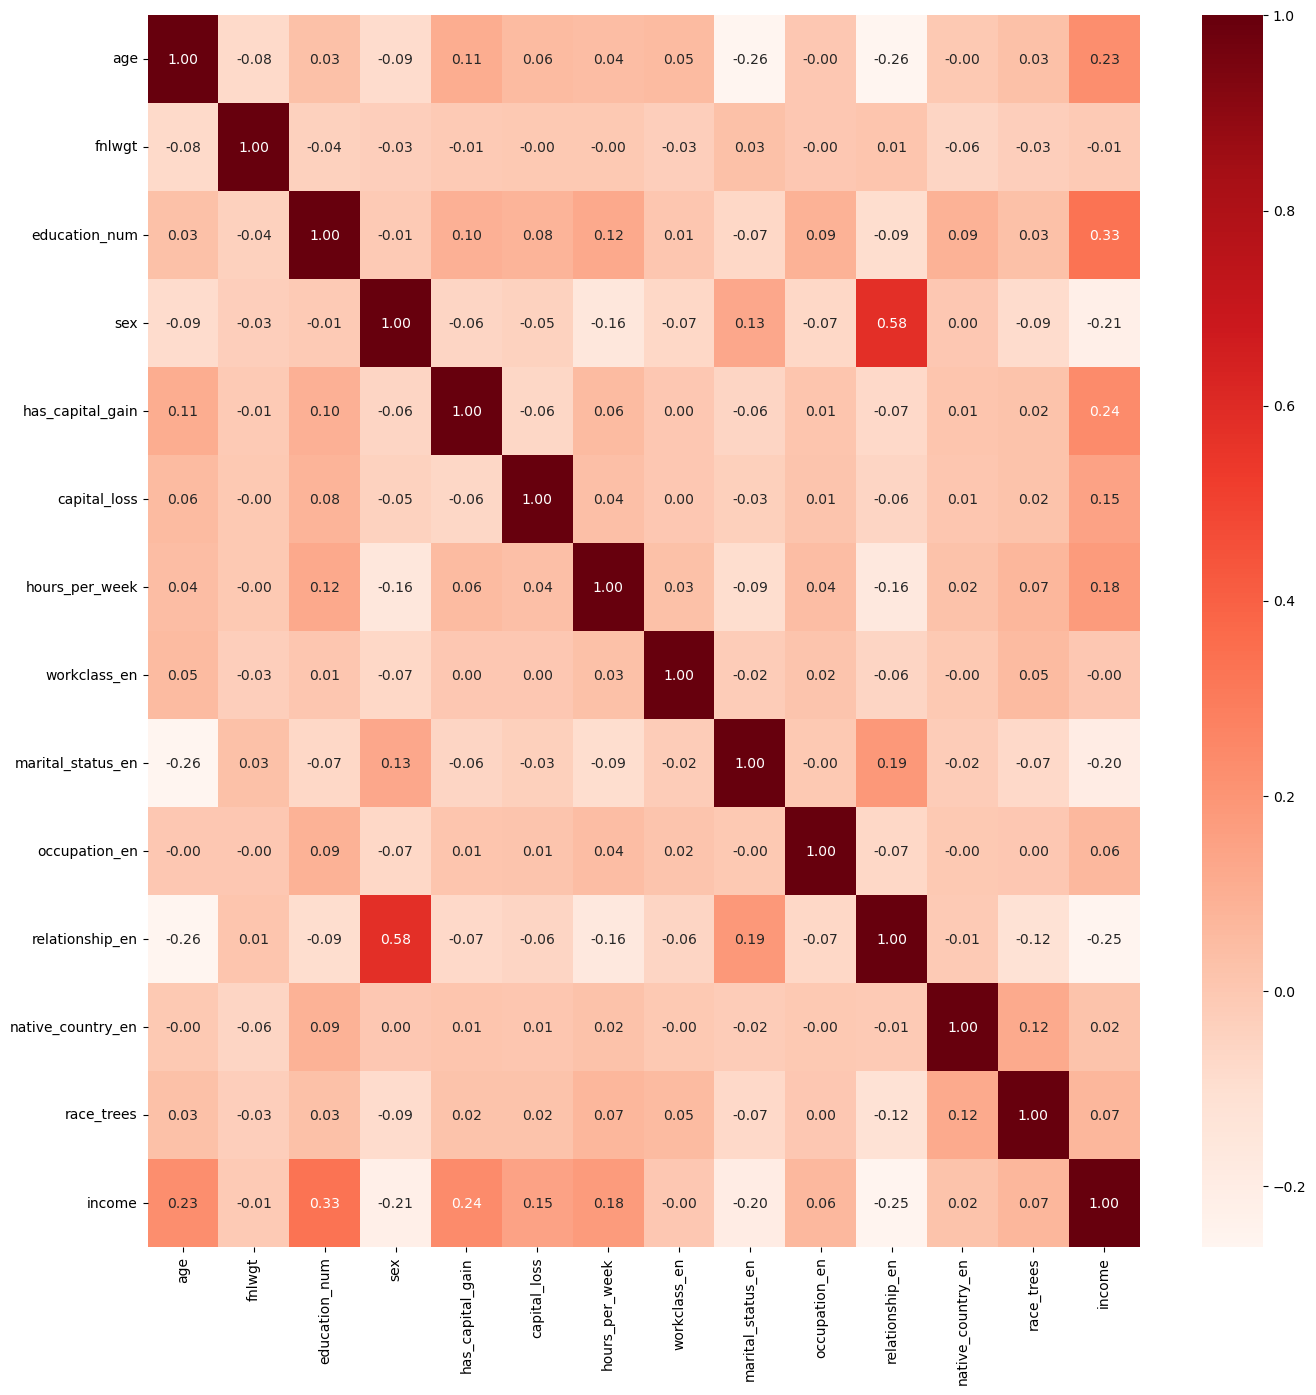

In [66]:
#Correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_tree, annot=True, cmap='Reds', fmt='.2f')

In [67]:
# correlation with target feature('income')
# top3
top_features = corr_tree['income'].abs().sort_values(ascending=False).iloc[1:4] 
top_features

education_num       0.332839
relationship_en     0.252965
has_capital_gain    0.240246
Name: income, dtype: float64

For Trees model data set, **"education_num", "relationshop_en", "capital_gain"** columns are highly correlated with target features.

## Feature Scaling

In [68]:
X = numeric_data.drop(['income'], axis=1)
Y = numeric_data['income']

In [69]:
X_co = X
Y_co = Y

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

I have a lot of outliers so, I decided to use robust scaler.

In [71]:
ro_scaler = RobustScaler()
X_train_scaled = ro_scaler.fit_transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

In [72]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [73]:
X_train

age    fnlwgt  education_num  sex  capital_gain_log  capital_loss  \
0      0.65 -1.199172      -0.333333  0.0          0.000000           0.0   
1      0.00  0.141345      -0.333333  0.0          8.051341           0.0   
2     -0.10 -1.201321       1.333333  0.0          0.000000           0.0   
3      1.10  0.152458      -0.333333  1.0          0.000000           0.0   
4      1.35 -1.307961      -0.333333  0.0          0.000000           0.0   
...     ...       ...            ...  ...               ...           ...   
38983  0.10 -1.235485       0.000000  0.0          0.000000           0.0   
38984 -0.45 -0.404509       1.000000  0.0          0.000000           0.0   
38985  0.65 -0.236564       0.000000  0.0          0.000000           0.0   
38986 -0.95  0.317421      -1.000000  1.0          0.000000           0.0   
38987 -0.65  0.387664      -0.333333  0.0          0.000000           0.0   

       hours_per_week  workclass_en  marital_status_en  occupation_en  \
0                10.0           0.0                0.0      -0.285714   
1                 0.0           0.0                0.0      -0.571429   
2                 5.0           0.0                1.0       0.428571   
3                 0.0           0.0                2.0      -0.857143   
4                 0.0           0.0                0.0      -0.428571   
...               ...           ...                ...            ...   
38983             0.0           2.0                1.5      -0.571429   
38984             5.0           0.0                0.0       0.714286   
38985             0.0           0.0                0.0      -0.571429   
38986             0.0           0.0                1.0      -0.857143   
38987             0.0           0.0                1.0      -0.571429   

       relationship_en  native_country_en  race_Asian-Pac-Islander  \
0            -0.333333                0.0                      0.0   
1             0.666667                0.0                      0.0   
2             0.000000                0.0                      0.0   
3             1.000000                0.0                      0.0   
4            -0.333333                0.0                      0.0   
...                ...                ...                      ...   
38983         0.000000                0.0                      0.0   
38984        -0.333333              -38.0                      0.0   
38985        -0.333333                0.0                      0.0   
38986         0.666667                0.0                      0.0   
38987         0.666667                0.0                      0.0   

       race_Black  race_Other  race_White  
0             0.0         0.0         0.0  
1             0.0         0.0         0.0  
2             0.0         0.0         0.0  
3             0.0         0.0         0.0  
4             0.0         0.0         0.0  
...           ...         ...         ...  
38983         0.0         0.0         0.0  
38984         0.0         0.0         0.0  
38985         0.0         0.0         0.0  
38986         0.0         0.0         0.0  
38987         0.0         0.0         0.0  

[38988 rows x 16 columns]

## ML modeling

### Logistic Regression

In [74]:
# Logistic Regression
logreg = LogisticRegression(random_state=16, max_iter=1000)
logreg.fit(X_train, Y_train)

# probablity for auc-roc cure
lg_probs = logreg.predict_proba(X_test)
lg_probs

array([[0.63957185, 0.36042815],
       [0.86375258, 0.13624742],
       [0.98849966, 0.01150034],
       ...,
       [0.58971974, 0.41028026],
       [0.93366654, 0.06633346],
       [0.92162342, 0.07837658]])

In [75]:
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[6952,  461],
       [1295, 1039]])

- True Negatives (TN) = 6952<br>
The model correctly predicted 6952 people as earning ≤50K.

- False Positives (FP) = 461<br>
The model incorrectly predicted 461 people as earning >50K when they actually earn ≤50K (Type I error).

- False Negatives (FN) = 1295<br>
The model incorrectly predicted 1295 people as earning ≤50K when they actually earn >50K (Type II error).

- True Positives (TP) = 1039<br>
The model correctly predicted 1039 people as earning >50K.

In [76]:
# probablity

print(f"Train Accuracy score for Logistic Regression: {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy score for Logistic Regression: {accuracy_score(Y_test, y_pred):.2f}")


target_names = ['<=50K', '>50K']
print(classification_report(Y_test, y_pred, target_names = target_names))

Train Accuracy score for Logistic Regression: 0.82
Test Accuracy score for Logistic Regression: 0.82
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7413
        >50K       0.69      0.45      0.54      2334

    accuracy                           0.82      9747
   macro avg       0.77      0.69      0.71      9747
weighted avg       0.81      0.82      0.81      9747



- Key Observation
    1. Major issue: The model struggles to identify >50K earners, missing 55% of them due to the low recall of 0.45.
- Final Verdict
    1. Good accuracy (82%) with no overfitting.
    2. Severe class imbalance issue: The model is biased toward ≤50K and struggles with >50K earners (low recall of 0.45).
    3. High False Negatives for >50K → Many high-income individuals are misclassified as low-income.

### KNN

In [77]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_knn_pred = knn.predict(X_test)
    error = 1 - accuracy_score(Y_test, Y_knn_pred)
    error_rates.append(error)

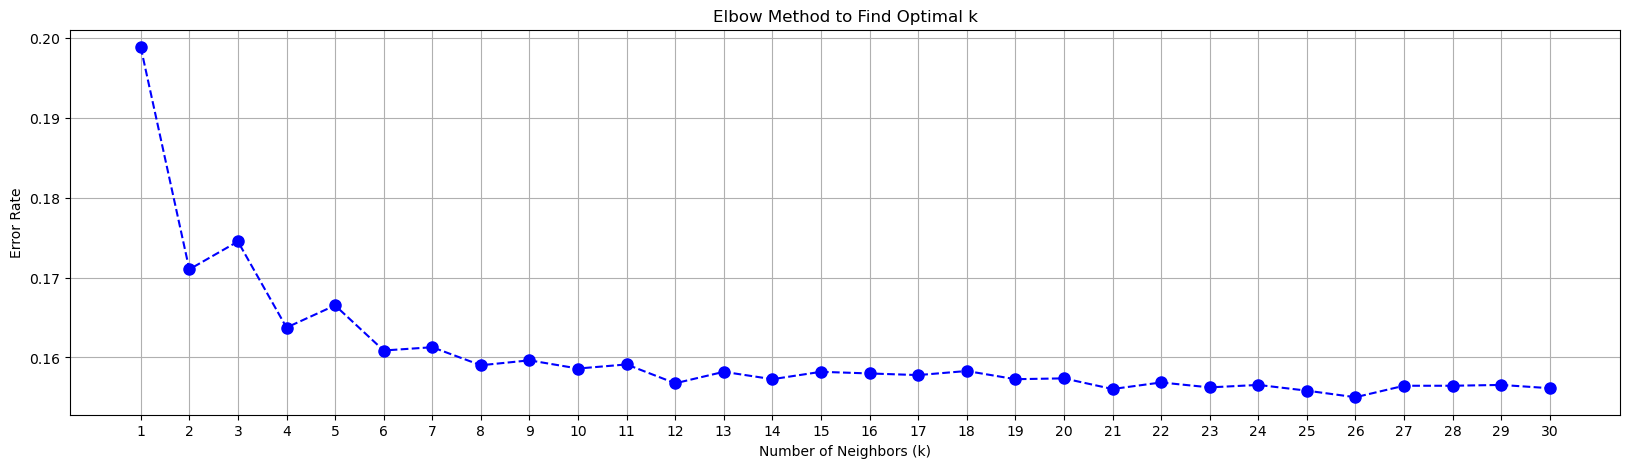

In [78]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

**The error rate is the least for k = 26.**

In [79]:
#Performing KNN with optimal value of k
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, Y_train)

Y_knn_probs = knn.predict_proba(X_test)
Y_knn_probs

y_pred_train = knn.predict(X_train)
Y_knn_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_knn_pred)
conf_matrix

array([[6922,  491],
       [1020, 1314]])

-	True Negatives (TN) = 6922<br>
The model correctly predicted 6922 people as earning ≤50K.
-	False Positives (FP) = 491<br>
The model incorrectly predicted 491 people as earning >50K, when they actually earn ≤50K (Type I error).
-	False Negatives (FN) = 1020<br>
The model incorrectly predicted 1020 people as earning ≤50K, when they actually earn >50K (Type II error).
-	True Positives (TP) = 1314<br>
The model correctly predicted 1314 people as earning >50K.


In [80]:
print(f"Train Accuracy score for KNN: {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy score for KNN: {accuracy_score(Y_test, Y_knn_pred):.2f}")

target_names = ['<=50K', '>50K']
print(classification_report(Y_test, y_pred, target_names = target_names))

Train Accuracy score for KNN: 0.85
Test Accuracy score for KNN: 0.84
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7413
        >50K       0.69      0.45      0.54      2334

    accuracy                           0.82      9747
   macro avg       0.77      0.69      0.71      9747
weighted avg       0.81      0.82      0.81      9747



- Overall Observation
    1. The model struggles with >50K earners, misclassifying 55% of them as ≤50K.
- Final Verdict
    1. Good overall accuracy (84%) and strong recall for ≤50K (94%).
    2. Class imbalance issue: The model struggles with the >50K class, identifying only 45% of them correctly.
    3. High False Negatives for >50K: Many high earners are misclassified as ≤50K.

### Decision Tree

In [81]:
# split data for trees model
X_t = tree_data.drop(['income'], axis=1)
Y_t = tree_data['income']

X_t_train, X_t_test, Y_t_train, Y_t_test = train_test_split(X_t, Y_t, test_size=0.2, random_state=42)

In [82]:
#Find the best value for max_depth in decision tree
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(DecisionTreeClassifier(criterion= 'entropy', max_depth=d), X_t_train, Y_t_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 7


In [83]:
dt_clr_opt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7)
dt_clr_opt.fit(X_t_train, Y_t_train)

#predict
y_pred_train = dt_clr_opt.predict(X_t_train)
y_pred_test = dt_clr_opt.predict(X_t_test)

conf_matrix = confusion_matrix(Y_t_test, y_pred_test)
conf_matrix

array([[6914,  499],
       [1096, 1238]])

- True Negatives (TN) = 6914<br>
The model correctly predicted 6914 people as earning ≤50K.
- False Positives (FP) = 499<br>
The model incorrectly predicted 499 people as earning >50K, when they actually earn ≤50K (Type I error).
- False Negatives (FN) = 1096<br>
The model incorrectly predicted 1096 people as earning ≤50K, when  they actually earn >50K (Type II error).
- True Positives (TP) = 1238<br>
The model correctly predicted 1238 people as earning >50K.

In [84]:
print(f"Train Accuracy:, {accuracy_score(Y_t_train, y_pred_train):.2f}")
print(f"Test Accuracy:, {accuracy_score(Y_t_test, y_pred_test):.2f}")
target_names = ['<=50K', '>50K']
print("\nClassification Report:\n", classification_report(Y_t_test, y_pred_test, target_names=target_names))

Train Accuracy:, 0.84
Test Accuracy:, 0.84

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      7413
        >50K       0.71      0.53      0.61      2334

    accuracy                           0.84      9747
   macro avg       0.79      0.73      0.75      9747
weighted avg       0.83      0.84      0.83      9747



- Overall Observation
    1. The model struggles to correctly identify all >50K earners, misclassifying 47% of them as ≤50K.
- Final Verdict
    1. Good overall accuracy (84%) and strong recall for ≤50K (93%).
    2. Imbalance problem: The model struggles with the >50K class, only identifying 53% of them correctly.
    3. False Negatives for >50K: Many high earners are misclassified as ≤50K.

### Plot the decision tree

In [85]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin/"

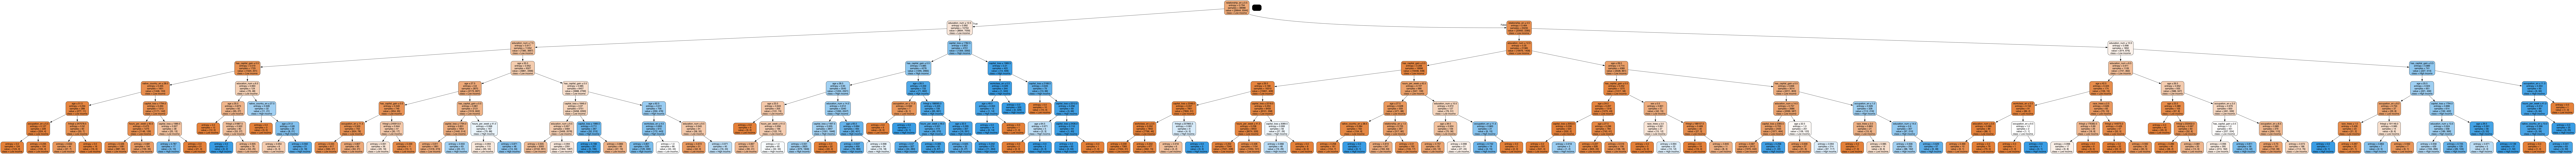

In [86]:
# Export the decision tree to DOT format
dot_data = StringIO()

export_graphviz(
    dt_clr_opt,
    out_file=dot_data, 
    filled=True,  
    rounded=True,  
    special_characters=True,  
    feature_names=X_t_train.columns, 
    class_names=['Low income','High income']
)

# Generate graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("decision_tree.png")  # Save as PNG

# Display the tree
Image(filename="decision_tree.png")

### SVM

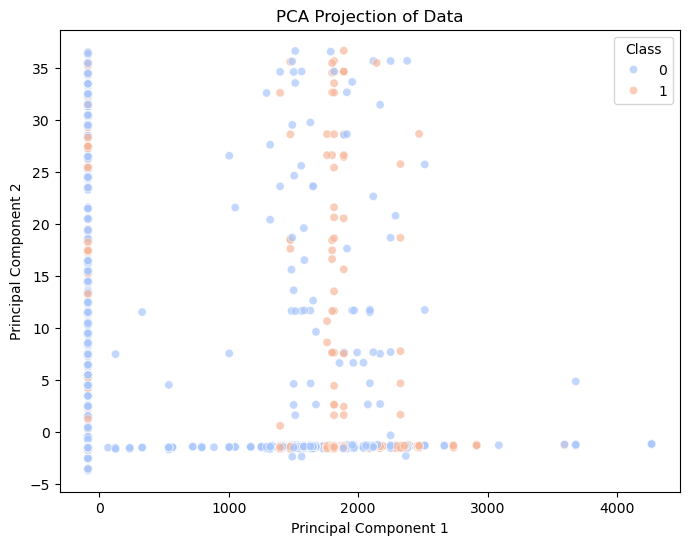

In [87]:
# to check what kernel should I use
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)  # dimensionality reduction

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Y_train, palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Data")
plt.legend(title="Class")
plt.show()

I couldn't find linear separation so I would use rbf kernel.

In [88]:
svm = SVC() #Model building

param_grid = {"C": [1, 10, 100, 200, 300]}

# GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, Y_train)

print(f"Best C: {grid_search.best_params_['C']}")

Best C: 300


In [89]:
svm_300 = SVC(random_state=42, C=300, probability=True)
svm_300.fit(X_train, Y_train)

Y_svm_probs = svm_300.predict_proba(X_test)

y_pred_train = svm_300.predict(X_train)
y_pred_test = svm_300.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred_test)
conf_matrix

array([[7072,  341],
       [1699,  635]])

-	True Negatives (TN) = 7072 <br>
The model correctly predicted 7072 people as earning ≤50K.
-	False Positives (FP) = 341<br>
The model incorrectly predicted 341 people as earning >50K, when they actually earn ≤50K (Type I error).
-	False Negatives (FN) = 1699<br>
The model incorrectly predicted 1699 people as earning ≤50K, when they actually earn >50K (Type II error).
-	True Positives (TP) = 635<br>
The model correctly predicted 635 people as earning >50K.

In [90]:
# train and test accuracy
print(f"Train Accuracy:, {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy:, {accuracy_score(Y_test, y_pred_test):.2f}")

target_names = ['<=50K', '>50K']
print(classification_report(Y_test, y_pred_test, target_names = target_names))


Train Accuracy:, 0.79
Test Accuracy:, 0.79
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      7413
        >50K       0.65      0.27      0.38      2334

    accuracy                           0.79      9747
   macro avg       0.73      0.61      0.63      9747
weighted avg       0.77      0.79      0.76      9747



- Overall Observation
    1. The model fails to identify 73% of actual >50K earners, which is a serious class imbalance problem.
- Final Verdict
    1. Good overall accuracy (79%) and strong recall for ≤50K (95%).
    2. Severe class imbalance: The model struggles with the >50K class, only identifying 27% of them correctly.
    3. Many False Negatives for >50K: Most high earners are misclassified as ≤50K.

### Random Forest

In [91]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [50, 100, 200],  # trees
    "max_depth": [10, 20, None],  
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4] 
}
# for better one
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_t_train, Y_t_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.8505952878477044


In [92]:
# the best model
best_rf = grid_search.best_estimator_

y_pred_train = best_rf.predict(X_t_train)
y_pred_test = best_rf.predict(X_t_test)

print(f"Train Accuracy: {accuracy_score(Y_t_train, y_pred_train):.2f}")
print(f"Test Accuracy: {accuracy_score(Y_t_test, y_pred_test):.2f}")
print()
# Confusion Matrix
conf_matrix = confusion_matrix(Y_t_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)
print()
# Classification Report
print("Classification Report:\n", classification_report(Y_t_test, y_pred_test, target_names=["≤50K", ">50K"]))

Train Accuracy: 0.91
Test Accuracy: 0.85

Confusion Matrix:
 [[6926  487]
 [ 956 1378]]

Classification Report:
               precision    recall  f1-score   support

        ≤50K       0.88      0.93      0.91      7413
        >50K       0.74      0.59      0.66      2334

    accuracy                           0.85      9747
   macro avg       0.81      0.76      0.78      9747
weighted avg       0.85      0.85      0.85      9747



- True Negatives (TN) = 6926<br>
The model correctly predicted 6926 people as earning ≤50K.
- False Positives (FP) = 487<br>
The model incorrectly predicted 487 people as earning >50K, when they actually earn ≤50K (Type I error).
- False Negatives (FN) = 956<br>
The model incorrectly predicted 956 people as earning ≤50K, when they actually earn >50K (Type II error).
- True Positives (TP) = 1378<br>
The model correctly predicted 1378 people as earning >50K.

- Overall Observations
    1. The model fails to correctly identify 41% of actual >50K earners, which can be problematic in applications where high-income classification is crucial.
    2. High FN count for >50K: Many high earners are misclassified, suggesting class imbalance issues.
- Final Verdict
    1. Decent accuracy (85%) and high recall for ≤50K earners (93%).
    2.  Slight overfitting (train accuracy 91% vs test accuracy 85%).
    3.  Severe class imbalance issue: The model performs poorly on the >50K class (low recall of 59%).
    4.  Many False Negatives for >50K: The model fails to identify 41% of actual high earners, which reduces its reliability for classifying >50K incomes.

## AUC-ROC curve

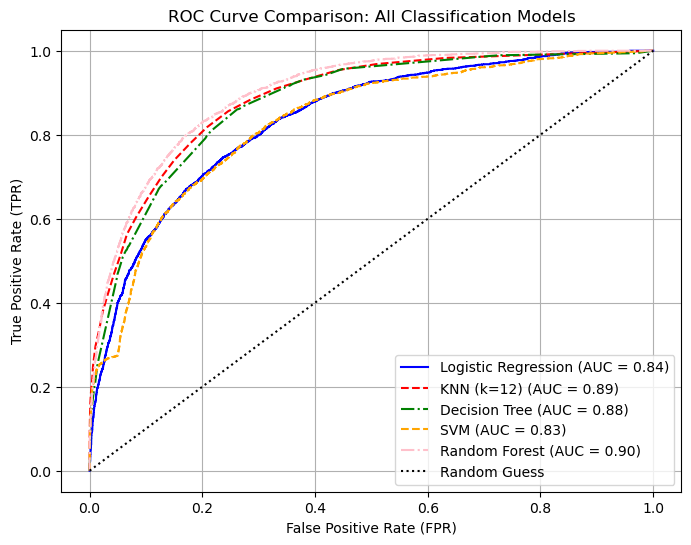

In [93]:
# Graph for only positive
Y_lr_probs = lg_probs[:, 1]
Y_knn_probs = Y_knn_probs[:, 1]
Y_dt_probs = dt_clr_opt.predict_proba(X_t_test)[:, 1]
Y_svm_probs = Y_svm_probs[:, 1]
Y_rf_probs = best_rf.predict_proba(X_t_test)[:, 1]

# Compute ROC curve and AUC for all the models
# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)
# KNN
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)
# Decision Trees
fpr_dt, tpr_dt, _ = roc_curve(Y_t_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)
# SVM
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)
# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(Y_t_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=12) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashed', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='pink', linestyle='dashdot', label=f'Random Forest (AUC = {auc_rf:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: All Classification Models")
plt.grid(True)
plt.legend(loc='best') 
plt.show()

### The best model is the Random Forest.

## AFTER SMOTE

In [94]:
Y.value_counts()

income
0    37057
1    11678
Name: count, dtype: int64

In [95]:
#Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X, Y = smote.fit_resample(X, Y)

In [96]:
Y.value_counts()

income
0    37057
1    37057
Name: count, dtype: int64

In [97]:
X.shape

(74114, 16)

**After SMOTE, I have 74114 rows and 16 columns**

In [98]:
#Apply SMOTE for Trees data set
smote = SMOTE(sampling_strategy='minority')
X_t, Y_t = smote.fit_resample(X_t, Y_t)

In [99]:
Y_t.value_counts()

income
0    37057
1    37057
Name: count, dtype: int64

In [100]:
X_t.shape

(74114, 13)

**After SMOTE, I have 74114 rows and 13 columns for Trees Data set**

## Feature Scaling

In [101]:
# split data for Linear model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ro_scaler = RobustScaler()
X_train_scaled = ro_scaler.fit_transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train.shape

(59291, 16)

In [102]:
# split data for trees model

X_t_train, X_t_test, Y_t_train, Y_t_test = train_test_split(X_t, Y_t, test_size=0.2, random_state=42)

## ML modeling

### Logistic Regression

In [103]:
# Logistic Regression
logreg = LogisticRegression(random_state=16, max_iter=2000)
logreg.fit(X_train, Y_train)

# probablity for auc-roc cure
lg_probs = logreg.predict_proba(X_test)

In [104]:
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[5825, 1640],
       [1348, 6010]])

- True Negatives (TN) = 5825 <br>
The model correctly predicted 5825 people as earning ≤50K.
- False Positives (FP) = 1640<br>
The model incorrectly predicted 1640 people as earning >50K, when they actually earn ≤50K (Type I error).
- False Negatives (FN) = 1384<br>
The model incorrectly predicted 1384 people as earning ≤50K, when they actually earn >50K (Type II error).
- True Positives (TP) = 5974<br>
The model correctly predicted 5974 people as earning >50K.

In [105]:
# probablity

print(f"Train Accuracy score for Logistic Regression: {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy score for Logistic Regression: {accuracy_score(Y_test, y_pred):.2f}")


target_names = ['<=50K', '>50K']
print(classification_report(Y_test, y_pred, target_names = target_names))

Train Accuracy score for Logistic Regression: 0.80
Test Accuracy score for Logistic Regression: 0.80
              precision    recall  f1-score   support

       <=50K       0.81      0.78      0.80      7465
        >50K       0.79      0.82      0.80      7358

    accuracy                           0.80     14823
   macro avg       0.80      0.80      0.80     14823
weighted avg       0.80      0.80      0.80     14823



- Observations
	1.	Balanced Performance → The model performs similarly across both classes, meaning it does not strongly favor one over the other.
	2.	Recall for >50K is slightly higher than ≤50K (0.82 vs. 0.78) → The model is slightly better at capturing high-income individuals.
	3.	Precision and Recall are close, leading to a well-balanced F1-score → No extreme trade-off between false positives and false negatives.

- Final Verdict
    1. The model performs well with an overall F1-score of 0.80, indicating a reliable classification performance.
    2. Some improvement can be made in recall for ≤50K (0.78), which means the model might be missing some low-income individuals.
	

### KNN

In [133]:
error_rates = []
k_values = range(1, 101)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_knn_pred = knn.predict(X_test)
    error = 1 - accuracy_score(Y_test, Y_knn_pred)
    error_rates.append(error)

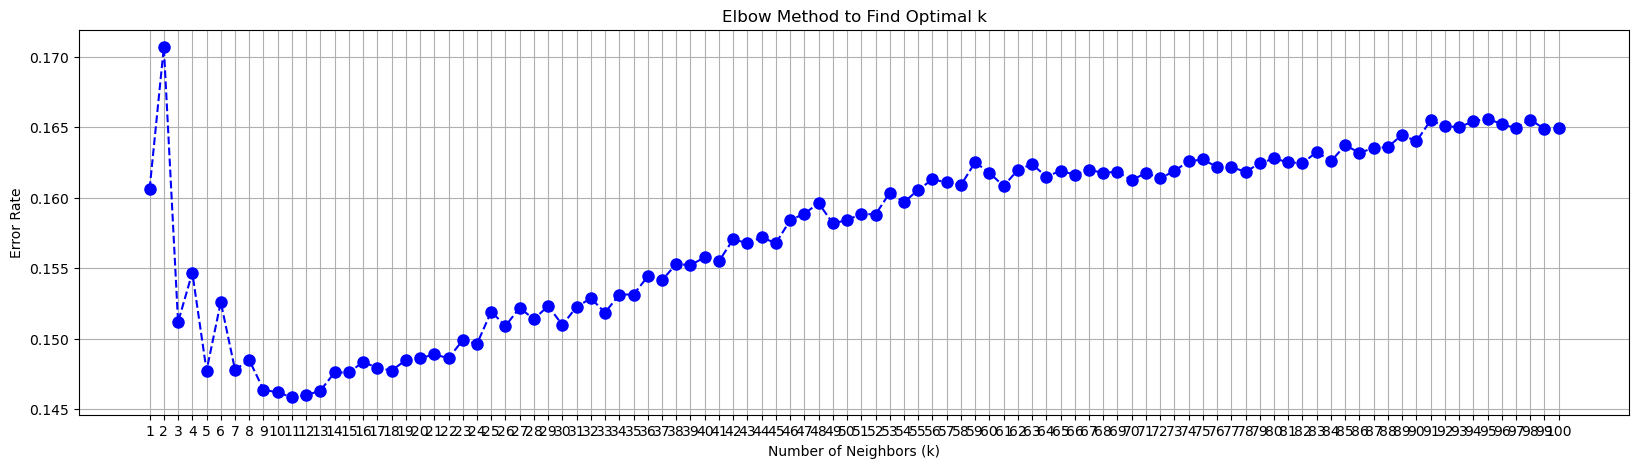

In [134]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 101))
plt.grid(True)
plt.show()

**The error rate is the least for k = 3.**

In [135]:
#Performing KNN with optimal value of k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_knn_probs = knn.predict_proba(X_test)
Y_knn_probs

y_pred_train = knn.predict(X_train)
Y_knn_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_knn_pred)
conf_matrix

array([[6300, 1165],
       [1076, 6282]])

- True Negatives (TN) = 6300 <br>
The model correctly predicted 6300 people as earning ≤50K.
- False Positives (FP) = 1165<br>
The model incorrectly predicted 1165 people as earning >50K, when they actually earn ≤50K (Type I error).
- False Negatives (FN) = 1076<br>
The model incorrectly predicted 1076 people as earning ≤50K, when they actually earn >50K (Type II error).
- True Positives (TP) = 6282<br>
The model correctly predicted 6282 people as earning >50K.

In [136]:
print(f"Train Accuracy score for KNN: {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy score for KNN: {accuracy_score(Y_test, Y_knn_pred):.2f}")

target_names = ['≤50K', '>50K']
print(classification_report(Y_test, Y_knn_pred, target_names = target_names))

Train Accuracy score for KNN: 0.92
Test Accuracy score for KNN: 0.85
              precision    recall  f1-score   support

        ≤50K       0.85      0.84      0.85      7465
        >50K       0.84      0.85      0.85      7358

    accuracy                           0.85     14823
   macro avg       0.85      0.85      0.85     14823
weighted avg       0.85      0.85      0.85     14823



- Observations
	1.	Balanced Classification → The model performs equally well on both classes, with no significant bias toward one.
	2.	Potential Overfitting → The 7% accuracy gap suggests that the model may be slightly overfitting. Reducing the number of neighbors (k) or applying regularization techniques might improve generalization.
	3.	Strong Overall Performance → With an F1-score of 0.85, the model is reliable and effective for classification.

- Final Verdict
	1. The KNN model performs well, with balanced precision, recall, and F1-scores across both classes.
    2. There is some overfitting, but it is not severe. Fine-tuning hyperparameters (e.g., increasing k) could help improve test performance.
	

In [137]:
cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)
print(f"Cross-validation mean accuracy: {cv_scores.mean():.2f}" )

Cross-validation mean accuracy: 0.85


**I initially thought this model was overfitting, but after comparing the test accuracy with the cross-validation results, I found them to be same, so I concluded that there is no issue.**

### Decision Tree

In [110]:
#Find the best value for max_depth in decision tree
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(DecisionTreeClassifier(criterion= 'entropy', max_depth=d), X_t_train, Y_t_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 13


In [111]:
dt_clr_opt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=12)
dt_clr_opt.fit(X_t_train, Y_t_train)

#predict
y_pred_train = dt_clr_opt.predict(X_t_train)
y_pred_test = dt_clr_opt.predict(X_t_test)

conf_matrix = confusion_matrix(Y_t_test, y_pred_test)
conf_matrix

array([[6180, 1285],
       [1059, 6299]])

- True Negatives (TN) = 6136<br>
The model correctly predicted 6136 people as earning ≤50K.
- False Positives (FP) = 1329<br>
The model incorrectly predicted 1329 people as earning >50K when they actually earn ≤50K (Type I error).
- False Negatives (FN) = 995<br>
The model incorrectly predicted 995 people as earning ≤50K when they actually earn >50K (Type II error).
- True Positives (TP) = 6363<br>
The model correctly predicted 6363 people as earning >50K.

In [112]:
print(f"Train Accuracy:, {accuracy_score(Y_t_train, y_pred_train):.2f}")
print(f"Test Accuracy:, {accuracy_score(Y_t_test, y_pred_test):.2f}")
target_names = ['≤50K', '>50K']
print("\nClassification Report:\n", classification_report(Y_t_test, y_pred_test, target_names=target_names))

Train Accuracy:, 0.86
Test Accuracy:, 0.84

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.85      0.83      0.84      7465
        >50K       0.83      0.86      0.84      7358

    accuracy                           0.84     14823
   macro avg       0.84      0.84      0.84     14823
weighted avg       0.84      0.84      0.84     14823



- Observations
	1.	Balanced Performance → The model performs similarly across both classes, meaning it does not strongly favor one over the other.
	2.	Recall for >50K is slightly higher than ≤50K (0.86 vs. 0.83) → The model is slightly better at capturing high-income individuals.
	3.	Precision and Recall are close, leading to a well-balanced F1-score → No extreme trade-off between false positives and false negatives.

- Final Verdict
    1. The model performs well with an overall F1-score of 0.84, indicating a reliable classification performance.
    2. Some improvement can be made in recall for ≤50K (0.83), which means the model might be missing some low-income individuals.
	

In [130]:
cv_scores = cross_val_score(dt_clr_opt, X_t_train, Y_t_train, cv=5)
print(f"Cross-validation mean accuracy: {cv_scores.mean():.2f}" )

Cross-validation mean accuracy: 0.84


**I initially thought this model was overfitting, but after comparing the test accuracy with the cross-validation results, I found them to be same, so I concluded that there is no issue.**

### Plot the decision tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.293719 to fit



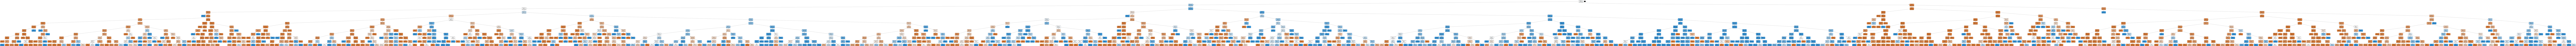

In [113]:
# Export the decision tree to DOT format
dot_data = StringIO()

export_graphviz(
    dt_clr_opt,
    out_file=dot_data, 
    filled=True,  
    rounded=True,  
    special_characters=True,  
    feature_names=X_t_train.columns, 
    class_names=['Low income','High income']
)

# Generate graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("decision_tree_SMOTE.png")  # Save as PNG

# Display the tree
Image(filename="decision_tree_SMOTE.png")

### SVM

In [114]:
from sklearn.utils import resample

X_train_sample, Y_train_sample = resample(X_train, Y_train, n_samples=5000, random_state=42)  # 5000개만 사용

grid_search.fit(X_train_sample, Y_train_sample)

svm = SVC() #Model building

param_grid = {"C": [10, 100, 200, 300]}

# GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_sample, Y_train_sample)

print(f"Best C: {grid_search.best_params_['C']}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best C: 300


In [115]:
svm_300 = SVC(random_state=42, C=300, probability=True)
svm_300.fit(X_train, Y_train)

Y_svm_probs = svm_300.predict_proba(X_test)

y_pred_train = svm_300.predict(X_train)
y_pred_test = svm_300.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred_test)
conf_matrix

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0

array([[5528, 1937],
       [1101, 6257]])

- True Negatives (TN) = 5521
The model correctly predicted 5521 people as earning ≤50K.
- False Positives (FP) = 1944
The model incorrectly predicted 1944 people as earning >50K, when they actually earn ≤50K (Type I error).
- False Negatives (FN) = 1094
The model incorrectly predicted 1094 people as earning ≤50K, when they actually earn >50K (Type II error).
- True Positives (TP) = 6264
The model correctly predicted 6264 people as earning >50K.

In [116]:
# train and test accuracy
print(f"Train Accuracy:, {accuracy_score(Y_train, y_pred_train):.2f}")
print(f"Test Accuracy:, {accuracy_score(Y_test, y_pred_test):.2f}")

target_names = ['≤50K', '>50K']
print(classification_report(Y_test, y_pred_test, target_names = target_names))


Train Accuracy:, 0.80
Test Accuracy:, 0.80
              precision    recall  f1-score   support

       <=50K       0.83      0.74      0.78      7465
        >50K       0.76      0.85      0.80      7358

    accuracy                           0.80     14823
   macro avg       0.80      0.80      0.79     14823
weighted avg       0.80      0.80      0.79     14823



- Key Observations
	1.	No Overfitting → Since train and test accuracy are the same (80%), the model generalizes well.
	2.	Class Imbalance Impact
    	-	The model is slightly biased toward the >50K class since it has a higher recall (0.85 vs. 0.74).
    	-	This means the model misses more actual ≤50K cases (higher False Negatives) than it does for >50K cases.
	3.	Better Recall for >50K Class → The model is more effective at capturing >50K earners (85%) than ≤50K earners (74%).
	4.	Trade-off Between Precision & Recall
    	-	The ≤50K class has higher precision (0.83) but lower recall (0.74), meaning it is good at confirming ≤50K cases but tends to miss some.
    	-	The >50K class has lower precision (0.76) but higher recall (0.85), meaning it captures most >50K cases but with slightly more False Positives.
- Final Verdict
    1. Balanced model but slightly favors the >50K class
    2. Good generalization (no overfitting)
    3. Might need adjustment to improve recall for ≤50K class 

### Random Forest

In [117]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [50, 100, 200],  # trees
    "max_depth": [10, 20, None],  
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4] 
}
# for better one
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_t_train, Y_t_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8658311877895228


In [118]:
# the best model
best_rf = grid_search.best_estimator_

y_pred_train = best_rf.predict(X_t_train)
y_pred_test = best_rf.predict(X_t_test)

print(f"Train Accuracy: {accuracy_score(Y_t_train, y_pred_train):.2f}")
print(f"Test Accuracy: {accuracy_score(Y_t_test, y_pred_test):.2f}")
print()
# Confusion Matrix
conf_matrix = confusion_matrix(Y_t_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)
print()
# Classification Report
print("Classification Report:\n", classification_report(Y_t_test, y_pred_test, target_names=["≤50K", ">50K"]))

Train Accuracy: 0.94
Test Accuracy: 0.87

Confusion Matrix:
 [[6254 1211]
 [ 737 6621]]

Classification Report:
               precision    recall  f1-score   support

        ≤50K       0.89      0.84      0.87      7465
        >50K       0.85      0.90      0.87      7358

    accuracy                           0.87     14823
   macro avg       0.87      0.87      0.87     14823
weighted avg       0.87      0.87      0.87     14823



- True Negatives (TN) = 6254
The model correctly predicted 6254 people as earning ≤50K.

- False Positives (FP) = 1211 (Type I error)
The model incorrectly predicted 1211 people as earning >50K when they actually earn ≤5ㅇ0K.

- False Negatives (FN) = 737 (Type II error)
The model incorrectly predicted 737 people as earning ≤50K when they actually earn >50K.

- True Positives (TP) = 6621
The model correctly predicted 6621 people as earning >50K.

- Key Observations
    1. Potential Overfitting -> the 7% accuarcy gap suggests that the model may be slightly overfitting.
    2. Strong Overall Performance -> with an F1-score of 0.87, the model is reliable and effective for classification.
    3. More False Positives (1211) than False Negatives (737) → The model overestimates high-income individuals more often than it misses them.

In [124]:
cv_scores = cross_val_score(best_rf, X_t_train, Y_t_train, cv=5)
print("Cross-validation mean accuracy:", cv_scores.mean())

Cross-validation mean accuracy: 0.8658311877895228


**I initially thought this model was overfitting, but after comparing the test accuracy with the cross-validation results, I found them to be similar, so I concluded that there is no issue.**

## AUC-ROC curve

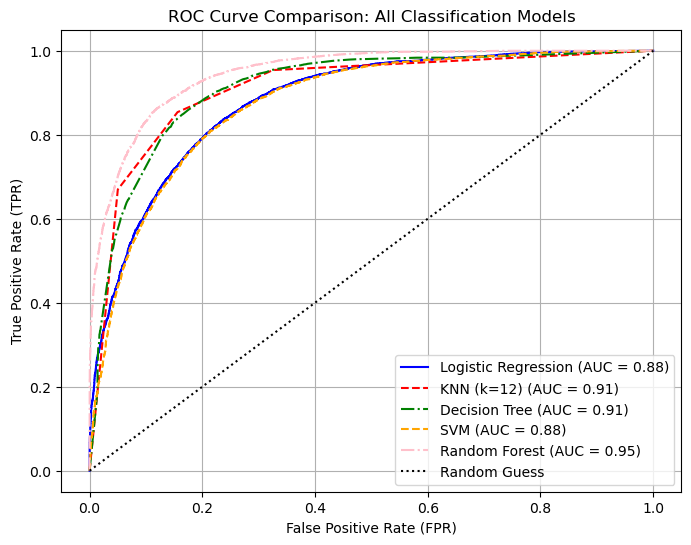

In [119]:
# Graph for only positive
Y_lr_probs = lg_probs[:, 1]
Y_knn_probs = Y_knn_probs[:, 1]
Y_dt_probs = dt_clr_opt.predict_proba(X_t_test)[:, 1]
Y_svm_probs = Y_svm_probs[:, 1]
Y_rf_probs = best_rf.predict_proba(X_t_test)[:, 1]

# Compute ROC curve and AUC for all the models
# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)
# KNN
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)
# Decision Trees
fpr_dt, tpr_dt, _ = roc_curve(Y_t_test, Y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)
# SVM
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)
# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(Y_t_test, Y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=12) (AUC = {auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashed', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='pink', linestyle='dashdot', label=f'Random Forest (AUC = {auc_rf:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: All Classification Models")
plt.grid(True)
plt.legend(loc='best') 
plt.show()

### Conclusion: Model Performance Before and After Addressing Class Imbalance

**Before Handling Class Imbalance**
- Random Forest (AUC = 0.90) performed the best, followed closely by KNN (AUC = 0.89) and Decision Tree (AUC = 0.88).
- SVM (AUC = 0.83) had the lowest AUC, suggesting it struggled more compared to the other models.

**After Applying SMOTE (Handling Class Imbalance)**
- Random Forest showed the highest improvement, increasing from AUC 0.90 to 0.95, indicating it benefited significantly from SMOTE.
- KNN and Decision Tree also improved to AUC 0.91, making them strong contenders.
- Logistic Regression and SVM improved from 0.84 → 0.88 and 0.83 → 0.88, respectively, showing that balancing the dataset positively impacted their performance.

**Key Observations & Interpretation**
1.	All models improved after handling class imbalance, suggesting that SMOTE helped address the bias toward the majority class.
	2.	Random Forest consistently performed the best both before and after SMOTE, making it the most robust model in this scenario.
	3.	Decision Tree and KNN saw notable improvements, indicating they were sensitive to class imbalance and benefited from synthetic data augmentation.
	4.	SVM and Logistic Regression had the lowest AUC initially but showed considerable improvement after SMOTE, meaning they required balanced data to perform well.

**Final Verdict**
- Best Model Before Class Imbalance → Random Forest (AUC = 0.90)
- Best Model After SMOTE → Random Forest (AUC = 0.95)
- Most Improved Models → Decision Tree & KNN (AUC increased to 0.91)
- Overall Recommendation → Random Forest remains the best choice, but Decision Tree and KNN are also strong contenders after handling class imbalance.